# How to Generate a Last Interaction Velocity (LIV) Plot
The Last Interaction Velocity Plot tracks and display the velocities at which different elements (or species) last interacted with packets in the simulation.

First, create and run a simulation for which you want to generate this plot:

In [1]:
from tardis import run_tardis
from tardis.io.atom_data import download_atom_data

# We download the atomic data needed to run the simulation
download_atom_data('kurucz_cd23_chianti_H_He_latest')

sim = run_tardis("tardis_example.yml", virtual_packet_logging=True)

Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

Atomic Data kurucz_cd23_chianti_H_He_latest already exists in /home/runner/Downloads/tardis-data/kurucz_cd23_chianti_H_He_latest.h5. Will not download - override with force_download=True.


Auto-detected Jupyter notebook environment
Initializing panel with ipywidgets comms for Jupyter notebook


Auto-detected Jupyter notebook environment
Initializing panel with ipywidgets comms for Jupyter notebook


BokehModel(combine_events=True, render_bundle={'docs_json': {'2e4181fd-bbde-4c87-a5c5-52245e558754': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'52282272-93f8-4d49-a69f-a04d2ef80240': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'6d819867-4368-44d1-a481-e23feaa23d94': {'version…

TqdmHBox(children=(HTML(value='Iterations:', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

TqdmHBox(children=(HTML(value='Packets:\u2007\u2007\u2007', layout=Layout(width='6%')), FloatProgress(value=0.…

Embedding the final state for Jupyter environments


<div class="alert alert-info">

Note

The virtual packet logging capability must be active in order to produce the Last Interaction Velocity Plot for virtual packets population. Thus, make sure to set `virtual_packet_logging: True` in your configuration file if you want to generate the Last Interaction Velocity Plot with virtual packets. It should be added under the `virtual` property of the `spectrum` property, as described in the [configuration schema](https://tardis-sn.github.io/tardis/io/configuration/components/spectrum.html).

</div>

Now, import the plotting interface for Last Interaction Velocity Plot, i.e. the `LIVPlotter` class.

In [2]:
from tardis.visualization.tools.liv_plot import LIVPlotter

And create a plotter object to process the data of simulation object `sim` for generating the Last Interaction Velocity plot.

In [3]:
plotter = LIVPlotter.from_simulation(sim)

## Static Plot (in matplotlib)
You can now call the `generate_plot_mpl()` method on your plotter object to create a highly informative and visually appealing Last Interaction Velocity plot using matplotlib.

### Virtual packets mode
By default, a Last Interaction Velocity plot is produced for the virtual packet population of the simulation.

<Axes: xlabel='Last Interaction Velocity (km/s)', ylabel='Packet Count'>

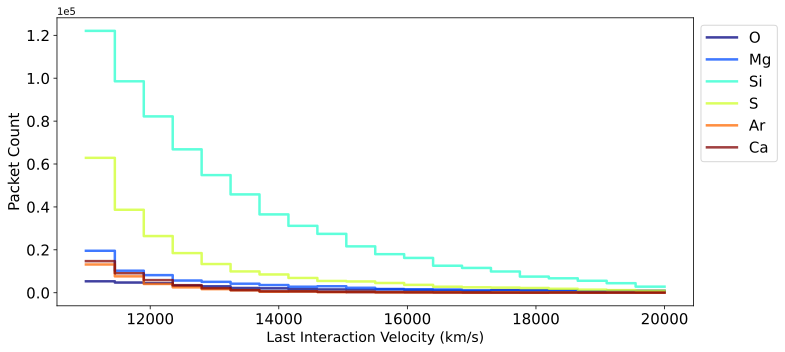

In [4]:
plotter.generate_plot_mpl()

### Real packets mode
You can produce a Last Interaction Velocity plot for the real packet population of the simulation by setting `packets_mode="real"` which is `"virtual"` by default.

<Axes: xlabel='Last Interaction Velocity (km/s)', ylabel='Packet Count'>

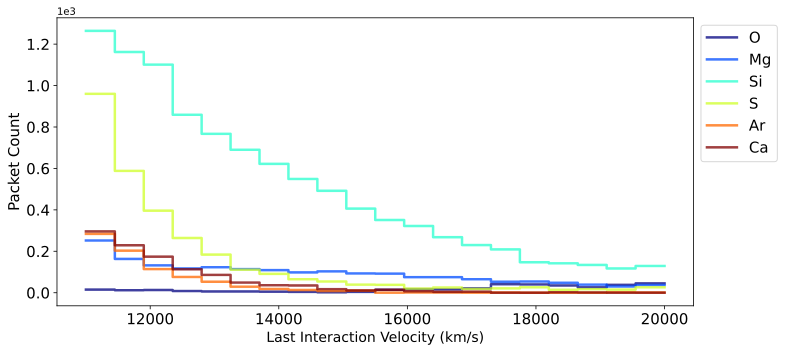

In [5]:
plotter.generate_plot_mpl(packets_mode="real")

### Plotting a specific wavelength range
You can also restrict the wavelength range of escaped packets that you want to plot by specifying `packet_wvl_range`. It should be a quantity in Angstroms, containing two values - lower lambda and upper lambda i.e. `[lower_lambda, upper_lambda] * u.AA`.

In [6]:
from astropy import units as u

[tardis.visualization.tools.liv_plot][INFO   ]  ['O III', 'Si IV', 'S I', 'S IV'] were not found in the provided wavelength range. (liv_plot.py:251)


<Axes: xlabel='Last Interaction Velocity (km/s)', ylabel='Packet Count'>

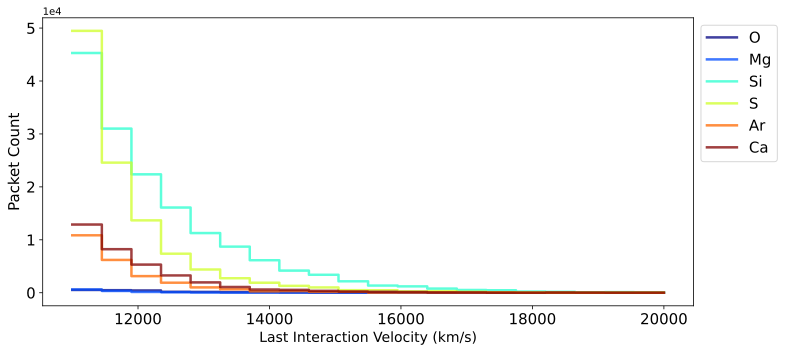

In [7]:
plotter.generate_plot_mpl(packet_wvl_range=[3000, 9000] * u.AA)

### Plotting only the top contributing elements

The `nelements` option allows you to plot the top contributing elements to the spectrum. Only the top elements are shown in the plot. Please note this works only for elements and not for ions.

<Axes: xlabel='Last Interaction Velocity (km/s)', ylabel='Packet Count'>

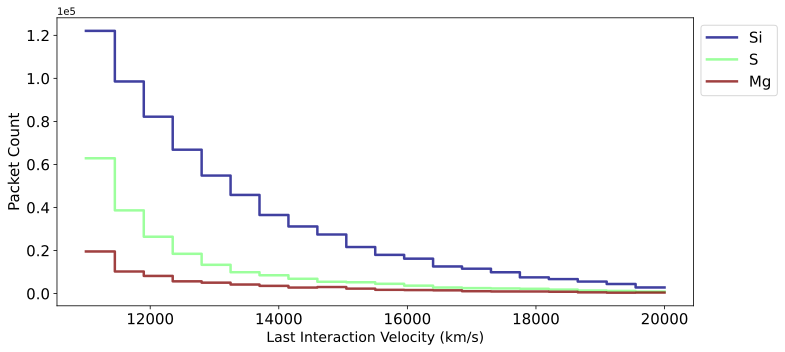

In [8]:
plotter.generate_plot_mpl(nelements=3)

### Choosing what elements/ions to plot

You can pass a `species_list` for the species you want plotted in the Last Interaction Velocity Plot. Valid options include elements (e.g., Si), ions (specified in Roman numeral format, e.g., Si II), a range of ions (e.g., Si I-III), or any combination of these.

<Axes: xlabel='Last Interaction Velocity (km/s)', ylabel='Packet Count'>

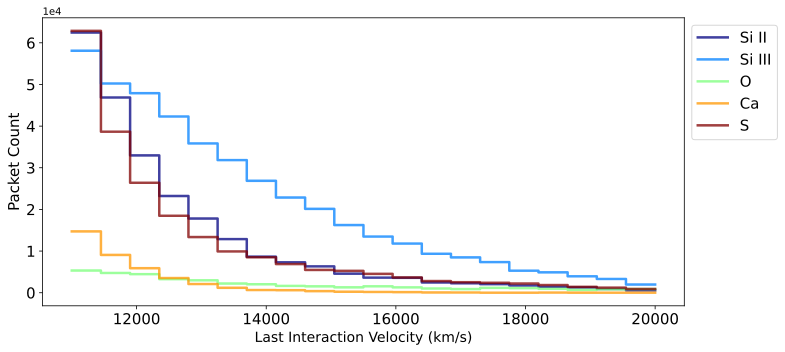

In [9]:
plotter.generate_plot_mpl(species_list = ["Si I-III", "O", "Ca", "S"])

When using both the `nelements` and the `species_list` options, `species_list` takes precedence. 

[tardis.visualization.tools.liv_plot][INFO   ]  Both nelements and species_list were requested. Species_list takes priority; nelements is ignored (liv_plot.py:417)


<Axes: xlabel='Last Interaction Velocity (km/s)', ylabel='Packet Count'>

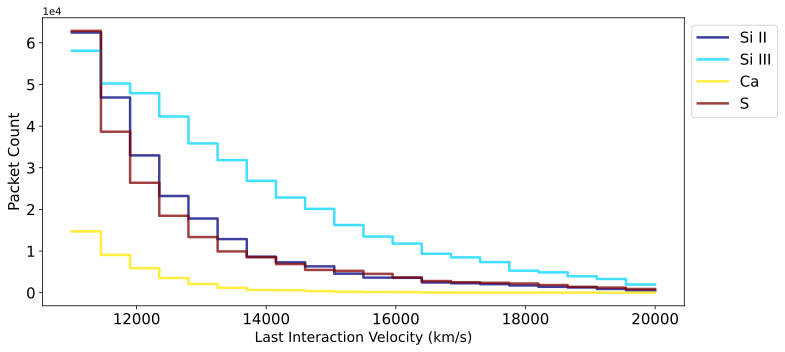

In [10]:
plotter.generate_plot_mpl(species_list = ["Si I-III", "Ca", "S"], nelements=3)

### Plotting a specific number of bins
You can regroup the bins with broader widths within the same velocity range using `num_bins`.

<Axes: xlabel='Last Interaction Velocity (km/s)', ylabel='Packet Count'>

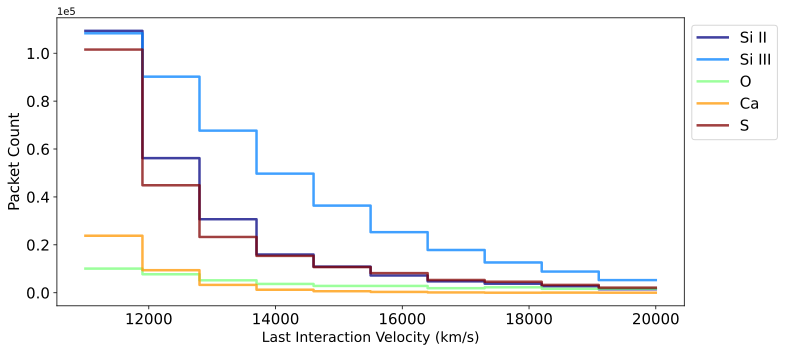

In [11]:
plotter.generate_plot_mpl(species_list = ["Si I-III", "O", "Ca", "S"], num_bins=10)

### Plotting on the Log Scale
You can plot on the log scale on x-axis using `xlog_scale=True` and on y-axis using `ylog_scale=True` by default both are set to `False` which plots on a linear scale.

<Axes: xlabel='Last Interaction Velocity (km/s)', ylabel='Packet Count'>

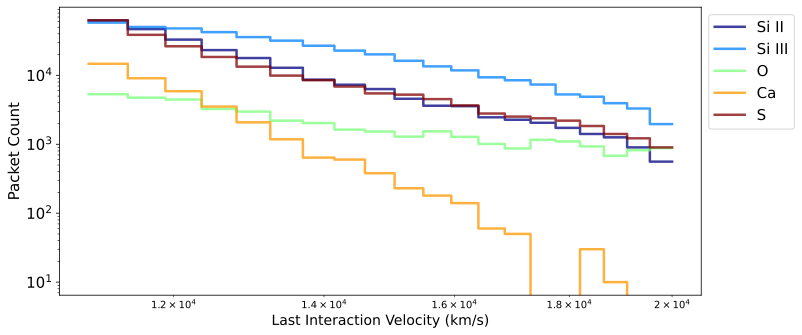

In [12]:
plotter.generate_plot_mpl(species_list = ["Si I-III", "O", "Ca", "S"], xlog_scale=True, ylog_scale=True)

### Plotting a specific velocity range
You can restrict the range of bins to plot in the Last Interaction Velocity Plot by specifying a valid `velocity_range`.

<Axes: xlabel='Last Interaction Velocity (km/s)', ylabel='Packet Count'>

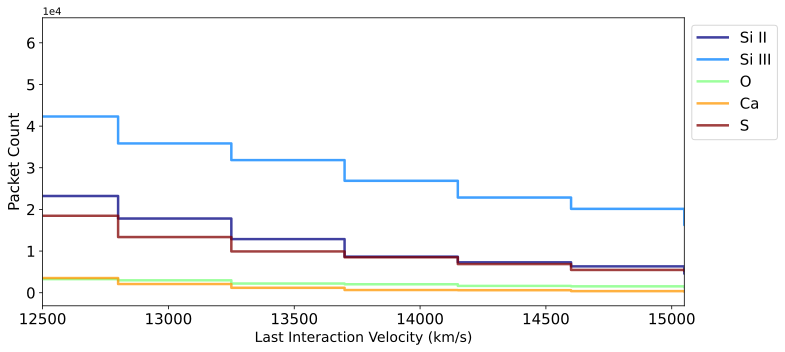

In [13]:
plotter.generate_plot_mpl(species_list = ["Si I-III", "O", "Ca", "S"], velocity_range=(12500, 15050))

### Additional plotting options

In [14]:
# To list all available options (or parameters) with their description
help(plotter.generate_plot_mpl)

Help on method generate_plot_mpl in module tardis.visualization.tools.liv_plot:

generate_plot_mpl(
    species_list=None,
    nelements=None,
    packets_mode='virtual',
    packet_wvl_range=None,
    ax=None,
    figsize=(11, 5),
    cmapname='jet',
    xlog_scale=False,
    ylog_scale=False,
    num_bins=None,
    velocity_range=None
) method of tardis.visualization.tools.liv_plot.LIVPlotter instance
    Generate the last interaction velocity distribution plot using matplotlib.

    Parameters
    ----------
    species_list : list of str, optional
        List of species to plot. Default is None which plots all species in the model.
    nelements : int, optional
        Number of elements to include in plot. The most interacting elements are included. If None, displays all elements.
    packets_mode : str, optional
        Packet mode, either 'virtual' or 'real'. Default is 'virtual'.
    packet_wvl_range : astropy.Quantity
        Wavelength range to restrict the analysis of escap

The `generate_plot_mpl` method also has options specific to the matplotlib API, thereby providing you with more control over how your last interaction velocity looks. Possible cases where you may use them are:

- `ax`: To plot on an Axis of a plot you're already working with, e.g. for subplots.

- `figsize`: To resize the plot as per your requirements.

- `cmapname`: To use a colormap of your preference, instead of "jet".

## Interactive Plot (in plotly)
If you're using the Last Interaction Velocity plot for exploration, consider creating an interactive version with `generate_plot_ply()`. This allows you to zoom, pan, inspect data values by hovering, resize the scale, and more conveniently.



**This method takes the same arguments as `generate_plot_mpl` except for a few specific to the Plotly library.** You can produce all the plots shown above in Plotly by passing the same arguments.

### Virtual packets mode
By default, a Last Interaction Velocity plot is produced for the virtual packet population of the simulation.

In [15]:
plotter.generate_plot_ply()

### Real packets mode
You can produce a Last Interaction Velocity plot for the real packet population of the simulation by setting `packets_mode="real"` which is `"virtual"` by default.

In [16]:
plotter.generate_plot_ply(packets_mode="real")

### Plotting a specific wavelength range
You can also restrict the wavelength range of escaped packets that you want to plot by specifying `packet_wvl_range`. It should be a quantity in Angstroms, containing two values - lower lambda and upper lambda i.e. `[lower_lambda, upper_lambda] * u.AA`.

In [17]:
from astropy import units as u

In [18]:
plotter.generate_plot_ply(packet_wvl_range=[3000, 9000] * u.AA)

[tardis.visualization.tools.liv_plot][INFO   ]  ['O III', 'Si IV', 'S I', 'S IV'] were not found in the provided wavelength range. (liv_plot.py:251)


### Plotting only the top contributing elements

The `nelements` option allows you to plot the top contributing elements to the spectrum. Only the top elements are shown in the plot. Please note this works only for elements and not for ions.

In [19]:
plotter.generate_plot_ply(nelements=10)

### Choosing what elements/ions to plot

You can pass a `species_list` for the species you want plotted in the Last Interaction Velocity Plot. Valid options include elements (e.g., Si), ions (specified in Roman numeral format, e.g., Si II), a range of ions (e.g., Si I-III), or any combination of these.

In [20]:
plotter.generate_plot_ply(species_list = ["Si I-III", "Ca", "S"])

When using both the `nelements` and the `species_list` options, `species_list` takes precedence. 

In [21]:
plotter.generate_plot_ply(species_list = ["Si I-III", "Ca", "S"], nelements=3)

[tardis.visualization.tools.liv_plot][INFO   ]  Both nelements and species_list were requested. Species_list takes priority; nelements is ignored (liv_plot.py:519)


### Plotting a specific number of bins
You can regroup the bins with broader widths within the same velocity range using `num_bins`.

In [22]:
plotter.generate_plot_ply(species_list = ["Si I-III", "Ca", "S"], num_bins=10)

### Plotting on the Log Scale
You can plot on the log scale on x-axis using `xlog_scale=True` and on y-axis using `ylog_scale=True` by default both are set to `False`.

In [23]:
plotter.generate_plot_ply(species_list = ["Si I-III", "Ca", "S"], xlog_scale=True, ylog_scale=True)

### Plotting a specific velocity range
You can restrict the range of bins to plot in the Last Interaction Velocity Plot by specifying a valid `velocity_range`.

In [24]:
plotter.generate_plot_ply(species_list = ["Si I-III", "Ca", "S"], velocity_range=(12500, 15050))

### Additional plotting options

In [25]:
# To list all available options (or parameters) with their description
help(plotter.generate_plot_ply)

Help on method generate_plot_ply in module tardis.visualization.tools.liv_plot:

generate_plot_ply(
    species_list=None,
    nelements=None,
    packets_mode='virtual',
    packet_wvl_range=None,
    fig=None,
    graph_height=600,
    cmapname='jet',
    xlog_scale=False,
    ylog_scale=False,
    num_bins=None,
    velocity_range=None
) method of tardis.visualization.tools.liv_plot.LIVPlotter instance
    Generate the last interaction velocity distribution plot using plotly.

    Parameters
    ----------
    species_list : list of str, optional
        List of species to plot. Default is None which plots all species in the model.
    nelements : int, optional
        Number of elements to include in plot. The most interacting elements are included. If None, displays all elements.
    packets_mode : str, optional
        Packet mode, either 'virtual' or 'real'. Default is 'virtual'.
    packet_wvl_range : astropy.Quantity
        Wavelength range to restrict the analysis of escaped


The `generate_plot_ply` method also has options specific to the plotly API, thereby providing you with more control over how your last interaction velocity plot looks. Possible cases where you may use them are:

 - `fig`: To plot the last interaction velocity plot on a figure you are already using e.g. for subplots.

 - `graph_height`: To specify the height of the graph as needed.
 
 - `cmapname`: To use a colormap of your preference instead of "jet".

## Using simulation saved as HDF
Other than producing the Last Interaction Velocity Plot for simulation objects in runtime, you can also produce it for saved TARDIS simulations.

In [26]:
# hdf_plotter = LIVPlotter.from_hdf("demo.h5") ## Files is too large - just as an example

This `hdf_plotter` object is similar to the `plotter` object we used above, **so you can use each plotting method demonstrated above with this too.**

In [27]:
# Static plot with virtual packets mode
# hdf_plotter.generate_plot_mpl()

In [28]:
# Static plot with real packets mode
#hdf_plotter.generate_plot_mpl(packets_mode="real")

In [29]:
# Interactive plot with virtual packets mode and specific list of species
# hdf_plotter.generate_plot_ply(species_list=["Si I-III", "Ca", "O", "S"])

In [30]:
# Interactive plot with virtual packets mode and regrouped bins
# hdf_plotter.generate_plot_ply(num_bins=10)